In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
base_dir = '../data/MagnaTagATune/'
annotation_fn = 'annotations_final.csv'
annotation_path = base_dir + annotation_fn
annotation_out_fn = 'annotation_reduced.csv'
annotation_out_path = base_dir + annotation_out_fn

annotations = pd.read_csv(annotation_path, sep='\t')

In [3]:
print("Len before removing wrong songs:{}".format(len(annotations)))
to_be_removed = ["6/norine_braun-now_and_zen-08-gently-117-146.mp3", 
                 "8/jacob_heringman-josquin_des_prez_lute_settings-19-gintzler__pater_noster-204-233.mp3",
                 "9/american_baroque-dances_and_suites_of_rameau_and_couperin-25-le_petit_rien_xiveme_ordre_couperin-88-117.mp3"]

annotations = annotations.drop(index = annotations.loc[annotations['mp3_path'].isin(to_be_removed)].index)\
                                                                                        .reset_index(drop=True)
print("Len after removing wrong songs:{}".format(len(annotations)))

Len before removing wrong songs:25863
Len after removing wrong songs:25860


In [4]:
synonyms = [['drum','beat', 'beats'],['chant', 'chanting'],['choir', 'choral'],
                ['classical', 'clasical', 'classic'],['drum', 'drums'],
                ['electro', 'electronic', 'electronica', 'electric'],
                ['fast', 'fast beat', 'quick'],
                ['female', 'female singer', 'female singing', 'female vocals','female vocal','female voice', 'woman', 'woman singing', 'women'],
                ['flute', 'flutes'],['guitar', 'guitars'],['hard', 'hard rock'],['harpsichord', 'harpsicord'],
                ['heavy', 'heavy metal', 'metal'],['horn', 'horns'],['india', 'indian'],['jazz', 'jazzy'],
                ['male', 'male singer', 'male vocal', 'male vocals', 'male voice', 'man', 'man singing', 'men'],
                ['opera', 'operatic'],['orchestra', 'orchestral'],['quiet', 'silence'],['singer', 'singing'],
                ['space', 'spacey'],['string', 'strings'],['synth', 'synthesizer'],['violin', 'violins'],
                ['vocal', 'vocals', 'voice', 'voices'],['strange', 'weird']]

non_relevant_tags = ['no flute', 'no guitar', 'no piano','no strings', 
                     'no violin','not classical', 'not english','not opera', 
                     'not rock','no beat', 'no singer','no drums', 'no singing',
                     'no vocal', 'no vocals', 'no voice', 'no voices']

annotations.drop(columns=non_relevant_tags, inplace=True)

renaming_map = {}
for row in synonyms:
    ref = row[0]
    for syn in row:
        if syn != ref:
            renaming_map[syn] = ref

In [5]:
annotations.rename(columns=renaming_map, inplace=True)
annotations = annotations.groupby(lambda x:x, axis=1).sum()
annotations = annotations.applymap(lambda x: 1 if type(x)==int and x>=1 else x)
annotations.columns.values

array(['acoustic', 'acoustic guitar', 'airy', 'ambient', 'arabic', 'banjo',
       'baroque', 'bass', 'bells', 'birds', 'blues', 'bongos', 'calm',
       'cello', 'celtic', 'chant', 'chimes', 'choir', 'chorus', 'clapping',
       'clarinet', 'classical', 'classical guitar', 'clip_id', 'country',
       'dance', 'dark', 'deep', 'different', 'disco', 'drone', 'drum',
       'duet', 'eastern', 'echo', 'eerie', 'electric guitar', 'electro',
       'english', 'fast', 'female', 'female opera', 'fiddle', 'flute',
       'folk', 'foreign', 'funk', 'funky', 'girl', 'guitar', 'happy',
       'hard', 'harp', 'harpsichord', 'heavy', 'hip hop', 'horn', 'house',
       'india', 'industrial', 'instrumental', 'irish', 'jazz', 'jungle',
       'keyboard', 'light', 'lol', 'loud', 'low', 'lute', 'male',
       'male opera', 'medieval', 'mellow', 'middle eastern', 'modern',
       'monks', 'mp3_path', 'new age', 'noise', 'oboe', 'old', 'opera',
       'orchestra', 'organ', 'oriental', 'percussion', 'piano

In [6]:
n = 30
top_n = (annotations.drop(['clip_id', 'mp3_path'], axis=1)
               .sum()
               .sort_values()
               .tail(n)
               .index
               .tolist())

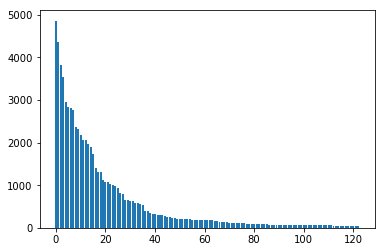

In [7]:
# plot 
plt.bar(range(len(annotations.columns.values)-2),list(annotations.drop(['clip_id','mp3_path'],axis=1)
                                                      .sum(axis=0).sort_values(ascending=False)))
plt.show()

In [8]:
final_annotations = annotations[top_n + ['mp3_path']] 
final_annotations.to_csv(path_or_buf=annotation_out_path, sep='\t')